presentation_of_the_test_results.ipynb

Compare all your results (all models without variable selection, and the best model with the two variable selection methods).


# Load data

In [1]:
import os
os.chdir("/content/drive/MyDrive/Projects/Pakkanodi Assignments/TV News channel dataset")

input_folder = "data/"
output_folder = "processed_data/"

channels = ["BBC", "CNN", "TIMESNOW", "CNNIBN", "NDTV"]
channel = channels[0]

import pandas as pd
import numpy as np

df = pd.read_csv(r""+output_folder+channel+"/"+channel+'.csv')

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = df.iloc[:,2:].to_numpy(), df.target.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(11340, 230) (3544, 230) (2836, 230)
(11340,) (3544,) (2836,)


# Models

## Dummy classifier

In [3]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

val_acc = dummy_clf.score(X_val, y_val)
print("Accuracy : {:.2f} %".format(val_acc*100))

Accuracy : 52.54 %


## linear SVM

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

linear_svm_model = make_pipeline(StandardScaler(), SVC(gamma='auto',
                                            kernel='linear',
                                            cache_size=200,
                                            tol=0.001,
                                            random_state=0))

linear_svm_model.fit(X_train, y_train)

val_acc = linear_svm_model.score(X_val, y_val)
print("Accuracy : {:.2f} %".format(val_acc*100))

Accuracy : 86.14 %


## Random Forest

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_model = RandomForestClassifier(max_depth=15,
                               n_estimators=20,
                               random_state=0,)

rf_model.fit(X_train, y_train)
val_acc = rf_model.score(X_val, y_val)
print("Accuracy : {:.2f} %".format(val_acc*100))

Accuracy : 87.31 %


## KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=10,
                             weights="distance",
                             algorithm="auto")

knn_model.fit(X_train, y_train)
val_acc = knn_model.score(X_val, y_val)
print("Accuracy : {:.2f} %".format(val_acc*100))

Accuracy : 76.23 %


## Linear model (Ridge classifier)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report, confusion_matrix

linear_model = RidgeClassifier(alpha=1,
                        fit_intercept=True,
                        max_iter=3,
                        solver='auto')

linear_model.fit(X_train, y_train)
val_acc = linear_model.score(X_val, y_val)
print("Accuracy : {:.2f} %".format(val_acc*100))

Accuracy : 84.56 %


## non-linear SVM

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

nonlinear_svm_model = make_pipeline(StandardScaler(), SVC(gamma='auto',
                                            kernel='rbf',
                                            cache_size=200,
                                            tol=0.001,
                                            random_state=0))

nonlinear_svm_model.fit(X_train, y_train)
print("Accuracy : {:.2f} %".format(nonlinear_svm_model.score(X_val, y_val)*100))

Accuracy : 86.46 %


## Deeplearning

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [ ]:
y_train_dl = np.zeros(y_train.shape)
y_test_dl = np.zeros(y_test.shape)
y_val_dl = np.zeros(y_val.shape)

y_train_dl[y_train==1] = 1
y_test_dl[y_test==1] = 1
y_val_dl[y_val==1] = 1

In [ ]:
# build a model
model3 = Sequential()
model3.add(Dense(230, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
model3.add(Dense(50, activation='relu'))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.summary() 

# compile the model
model3.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# now we just update our model fit call
history = model3.fit(X_train,
                    y_train_dl,
                    callbacks=[es],
                    epochs=50, # you can set this to a big number!
                    batch_size=128,
                    validation_data=(X_val, y_val_dl),
                    # validation_split=0.2,
                    shuffle=True,
                    verbose=1)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 230)               53130     
                                                                 
 dense_1 (Dense)             (None, 50)                11550     
                                                                 
 dense_2 (Dense)             (None, 16)                816       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 65,513
Trainable params: 65,513
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
89/89 [==============================] - 1s 6ms/step - loss: 6.2157 - accuracy: 0.6854 - val_loss: 0.9586 - val_accuracy: 0.7539
Epoch 2/50
89/89 [==========================

# Results Comparison

89/89 [==============================] - 0s 2ms/step


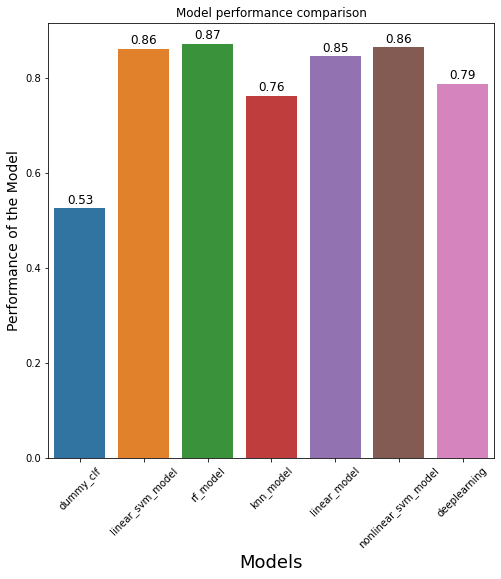

In [ ]:
# Importing libraries for dataframe creation
# and graph plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# Creating our own dataframe
accuracy_results = {"Model Names" : ["dummy_clf",
                                      "linear_svm_model",
                                      "rf_model",
                                      "knn_model",
                                      "linear_model",
                                      "nonlinear_svm_model",
                                      "deeplearning"],
        "Accuracy": [dummy_clf.score(X_val, y_val),
                    linear_svm_model.score(X_val, y_val),
                    rf_model.score(X_val, y_val),
                    knn_model.score(X_val, y_val),
                    linear_model.score(X_val, y_val),
                    nonlinear_svm_model.score(X_val, y_val),
                    accuracy_score(np.round(model3.predict(X_val),0), y_val_dl), ]}

accuracy_results = pd.DataFrame(accuracy_results, columns=['Model Names', 'Accuracy'])

plt.figure(figsize=(8, 8))

plots = sns.barplot(x="Model Names", y="Accuracy", data=accuracy_results)
 
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=18, )
plt.xticks(rotation = 45)
 
plt.ylabel("Performance of the Model", size=14)

plt.title("Model performance comparison")

plt.show()


# Variable Selection

## Lasso

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [ ]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=1
                      )

In [ ]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
search.best_params_# {'model__alpha': 1.2000000000000002}

{'model__alpha': 0.1}

In [ ]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [ ]:
importance = np.abs(coefficients)
importance

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01995844, 0.        , 0.25940167, 0.        , 0.02886789,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.05909839, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
lasso_features = list(df.columns[2:])
np.array(lasso_features)[importance > 0]

array(['11', '13', '15', '31', '104', '118', '129', '142', '156', '176',
       '347', '573', '601', '762', '924'], dtype='<U4')

In [ ]:

# X, y = df.iloc[:,2:].to_numpy(), df.target.replace(-1, 0).to_numpy()

lasso_X, y = df.loc[:, np.array(lasso_features)[importance > 0]], df.target.replace(-1, 0).to_numpy()

lasso_X_train, lasso_X_test, y_train, y_test = train_test_split(lasso_X, y, test_size=0.20, random_state=42)
lasso_X_train, lasso_X_val, y_train, y_val = train_test_split(lasso_X_train, y_train, test_size=0.20, random_state=42)

### SVM with features selected by Lasso 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

lasso_svm_model = make_pipeline(StandardScaler(), SVC(gamma='auto',
                                            kernel='rbf',
                                            cache_size=200,
                                            tol=0.001,
                                            random_state=0))

lasso_svm_model.fit(lasso_X_train, y_train)
lasso_svm_model.score(lasso_X_val, y_val)

0.8409732016925247

### SVM with all data features

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

simple_svm_model = make_pipeline(StandardScaler(), SVC(gamma='auto',
                                            kernel='rbf',
                                            cache_size=200,
                                            tol=0.001,
                                            random_state=0))

simple_svm_model.fit(X_train, y_train)
simple_svm_model.score(X_val, y_val)

0.8645980253878702

## Bi-directional elemination

In [ ]:
import joblib
import sys

sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import pandas as pd

In [ ]:
def stepwise_selection(data, target, SL_in=0.05, SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []

    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)

        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()

        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())

            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()

                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)

                else:
                    break 

        else:
            break

    return best_features

In [ ]:
import pandas as pd

# X = df.drop("target", 1)       # feature matrix
# y = df['target']               # target feature

X, y = df.iloc[:,2:], df.target

<ipython-input-28-b8b1deaf0eda>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop("target", 1)       # feature matrix


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

bde_features = stepwise_selection(X,y)
print(bde_features)

['11', '7', '6', '104', '118', '58', '31', '32', '17', '924', '580', '92', '95', '110', '106', '176', '347', '230', '102', '99', '444', '8', '129', '1028', '96', '23', '16', '109', '33', '192', '20', '1048', '114', '117', '103', '100', '601', '97', '166', 'index', '307', '215', '3', '319', '852', '406', '203', '240', '779', '762', '221', '726', '13', '231', '816', '71', '4', '127', '426', '234', '30', '111', '112', '572', '63', '709', '2', '25', '43', '108', '87', '1002', '14', '197']


In [ ]:
len(bde_features)

74

In [ ]:
from sklearn.model_selection import train_test_split

X, y = df.iloc[:,2:].to_numpy(), df.target.replace(-1, 0).to_numpy()
bde_X, y = df.loc[:, bde_features].to_numpy(), df.target.replace(-1, 0).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

bde_X_train, bde_X_test, y_train, y_test = train_test_split(bde_X, y, test_size=0.20, random_state=42)
bde_X_train, bde_X_val, y_train, y_val = train_test_split(bde_X_train, y_train, test_size=0.20, random_state=42)

### SVM with features selected by Bi-directional elemination

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

bde_svm_model = make_pipeline(StandardScaler(), SVC(gamma='auto',
                                            kernel='rbf',
                                            cache_size=200,
                                            tol=0.001,
                                            random_state=0))

bde_svm_model.fit(bde_X_train, y_train)
bde_svm_model.score(bde_X_val, y_val)

0.8723554301833568

# Results Comparison

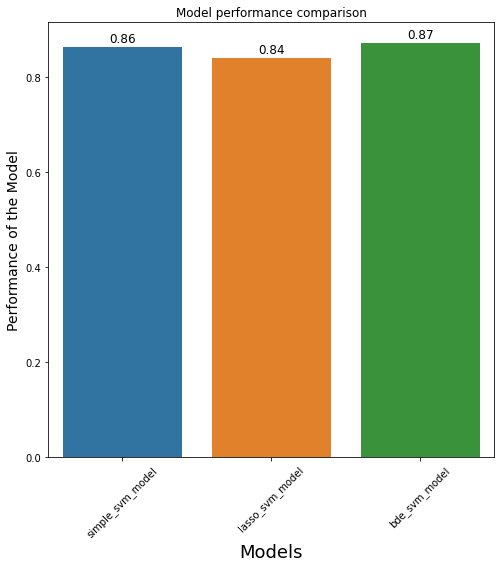

In [ ]:
# Importing libraries for dataframe creation
# and graph plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# Creating our own dataframe
accuracy_results = {"Model Names" : ["simple_svm_model",
                                      "lasso_svm_model",
                                      "bde_svm_model",],
        "Accuracy": [simple_svm_model.score(X_val, y_val),
                    lasso_svm_model.score(lasso_X_val, y_val),
                    bde_svm_model.score(bde_X_val, y_val),]}

accuracy_results = pd.DataFrame(accuracy_results, columns=['Model Names', 'Accuracy'])

plt.figure(figsize=(8, 8))

plots = sns.barplot(x="Model Names", y="Accuracy", data=accuracy_results)
 
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=18, )
plt.xticks(rotation = 45)
 
plt.ylabel("Performance of the Model", size=14)

plt.title("Model performance comparison")

plt.show()


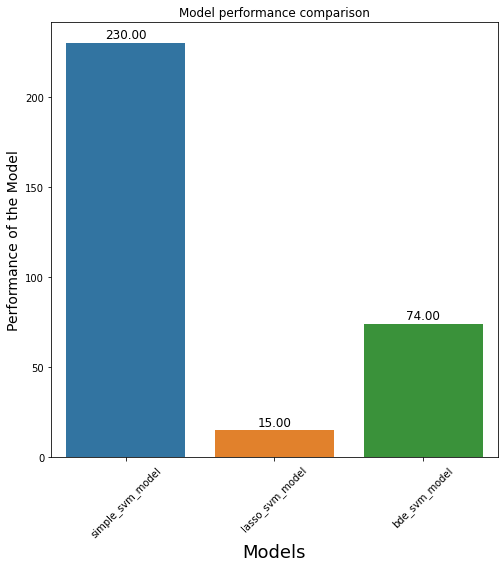

In [ ]:
# Importing libraries for dataframe creation
# and graph plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# Creating our own dataframe
accuracy_results = {"Model Names" : ["simple_svm_model",
                                      "lasso_svm_model",
                                      "bde_svm_model",],
                    "No of Features": [X_val.shape[1],
                                        lasso_X_val.shape[1],
                                        bde_X_val.shape[1] ]}

accuracy_results = pd.DataFrame(accuracy_results, columns=['Model Names', 'No of Features'])

plt.figure(figsize=(8, 8))

plots = sns.barplot(x="Model Names", y="No of Features", data=accuracy_results)
 
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=18, )
plt.xticks(rotation = 45)
 
plt.ylabel("Performance of the Model", size=14)

plt.title("Model performance comparison")

plt.show()


In [ ]:
# 67.8% reduction
